# <span style="color:DarkOliveGreen">Data Gathering and Basic Analysis

<span style="color:Olive">__Summary:__ In this file we shall download the data from Bloomberg and carry out basic analysis on it. 

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
import os
from xbbg import blp, pipeline
np.random.seed(0)

import datetime
# BDay is business day, not birthday...
from pandas.tseries.offsets import BDay

today = datetime.datetime.today()

In [23]:
# User defined names
index = "CDX.NA.IG"
ticker = "CDX IG CDSI GEN 5Y Corp"
# Define the date range
start_date = '2011-01-01'
end_date = (today - BDay(1)).strftime('%Y-%m-%d')

In [3]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\World Quant\Capstone\GitHub_main\Dev\CDX.NA.IG\Codes


In [4]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

## <span style="color:DarkOliveGreen">Functions

In [5]:
# Function to get Adjusted close price of the bloomberg ticker
def Get_Bloomberg_Price(ticker, start_date, end_date):
    """
        Returns a pandas dataframe with adjusted close price
    """
    df = blp.bdh(tickers=ticker, flds='px_mid',start_date=start_date, end_date=end_date, 
                 Per='D', Fill='P', Days='A',)[ticker]
    df['Adj Close'] = df['px_mid']
    df.drop(['px_mid'], axis=1,inplace=True)
    df.dropna(inplace=True)
    df.index.name = 'Date'
    return df

In [6]:
def Get_LogReturn(df, var_in, var_out):
    """
        Calculates the log returns
    """
    df[var_out] = np.log(df[var_in]).diff()
    return df

In [7]:
def Print_Formatted_metrics(df, stock, var):
    """
        Prints the below values for the given variable:
            1. Mean
            2. Standard Deviation
            3. Skewness
            4. Kurtosis
            4. Excess Kurtosis
    """
    print("++++++++++++++++++++++++++++++++")
    print("             Stock: {0}".format(stock))
    print("              Mean: {:.6f}".format(df[var].mean()))
    print("Standard Deviation: {:.6f}".format(df[var].std()))
    print("          Skewness: {:.6f}".format(df[var].skew()))
    print("          Kurtosis: {:.6F}".format(df[var].kurtosis()))
    print("   Excess Kurtosis: {:.6f}".format(df[var].kurtosis()-3))
    print("++++++++++++++++++++++++++++++++")
    return

## <span style="color:DarkOliveGreen">Download the Data

In [9]:
# Download CDX.NA.IG Data for the given date range
df = Get_Bloomberg_Price(ticker, start_date, end_date)
df.tail()

,Adj Close
Date,
2023-02-03,69.044
2023-02-04,69.044
2023-02-05,69.044
2023-02-06,70.166
2023-02-07,68.711


In [10]:
# Calculate log returns
df = Get_LogReturn(df, 'Adj Close', 'log returns')

In [12]:
# Head of data
df.tail()

,Adj Close,log returns
Date,,
2023-02-03,69.044,0.027100
2023-02-04,69.044,0.000000
2023-02-05,69.044,0.000000
2023-02-06,70.166,0.016120
2023-02-07,68.711,-0.020955


## <span style="color:DarkOliveGreen">Basic Exploratary Analysis

In [13]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

### <span style="color:DarkOliveGreen">Histogram of Returns

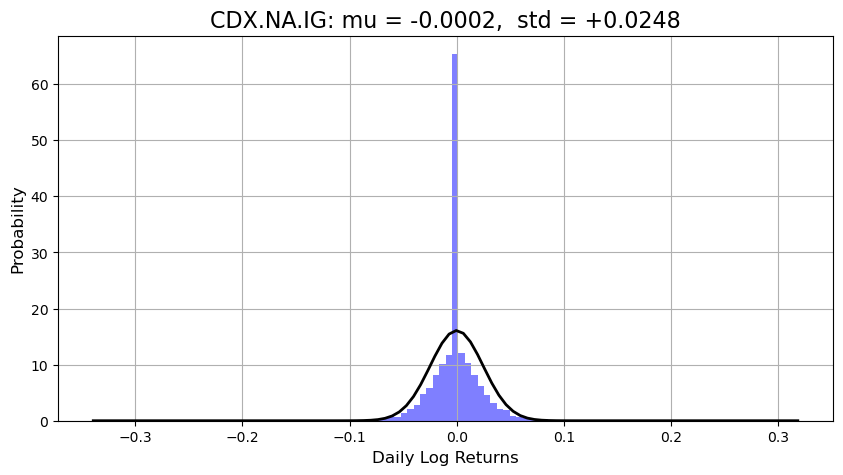

In [25]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df['log returns'].dropna())
# Histogram for log returns
plt.figure(figsize=(10,5))
plt.hist(df['log returns'].dropna(), bins=100, density=True, facecolor='b', alpha=0.5)
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "{}: mu = {:+.4f},  std = {:+.4f}".format(index, mu, std)
plt.title(title, fontsize=16)
plt.xlabel("Daily Log Returns", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.grid()
plt.savefig('histogram of returns ' + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Olive"> Based on above plot, we can conclude that the log returns are not normally distributed

### <span style="color:DarkOliveGreen">Time Series Plot of Returns

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df['log returns'], alpha=0.5)
plt.title('{} Log Returns'.format(index), fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.savefig('Time series of returns ' + str(index) +'.png')
plt.close()

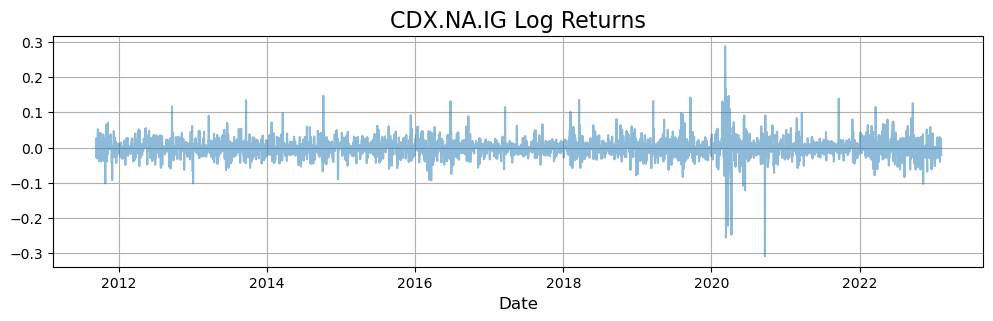

In [27]:
plt.figure(figsize=(12,3))
plt.plot(df['log returns'], alpha=0.5)
plt.title('{} Log Returns'.format(index), fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.show()

__Comments:__ <span style="color:Blue"> There are certain period of high volatility (Jun, 2011 to Dec, 2011, Feb 2020 to April, 2020)

### <span style="color:DarkOliveGreen">Basic Statistics for Log Returns

In [30]:
# Get basic statistics for log returns
Print_Formatted_metrics(df, index, 'log returns')

++++++++++++++++++++++++++++++++
             Stock: CDX.NA.IG
              Mean: -0.000157
Standard Deviation: 0.024813
          Skewness: -0.063156
          Kurtosis: 21.426755
   Excess Kurtosis: 18.426755
++++++++++++++++++++++++++++++++


## <span style="color:DarkOliveGreen">Save the Data

In [31]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
df.drop("log returns", axis=1, inplace=True)
df.to_csv(index +".csv", index=True)